## Carga de Información de asentamientos

In [2]:
import geopandas as gpd
gdf = gpd.read_file('data/PR05_Asentamientos_Informales_MIVAH_2023.shp')
gdf = gdf.to_crs(epsg=32614)

Es importante checar el crs de los poligonos porque lo necesitarás para la descarga

In [3]:
gdf.crs

<Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [1]:
from qgis.core import (
    QgsApplication, 
    QgsProcessingFeedback, 
    QgsProject
)
from qgis.analysis import QgsNativeAlgorithms
import processing

## Descarga

In [4]:
from qgis.core import (
    QgsApplication, 
    QgsProcessingFeedback, 
    QgsProject
)
from qgis.analysis import QgsNativeAlgorithms
import processing

#from osgeo import gdal
#gdal.SetConfigOption('CHECK_DISK_FREE_SPACE', 'FALSE') # Para descargar archivos muy pesados pero no lo necesitamos

# Inicializar QGIS Application # Creo que si comentas esta línea funciona igual
QgsApplication.setPrefixPath("/home/maanuel_real/conda/envs/pyqgis", True)
app = QgsApplication([], False)
app.initQgis()

# Registrar algoritmos
app.processingRegistry().addProvider(QgsNativeAlgorithms())

# Cargar el proyecto QGIS
project_path = 'layer.qgz'  # Ruta archivo Qgis
project = QgsProject.instance()
project.read(project_path)

# Buscar la capa por nombre
layer_name = "Google Satellite"  # Nombre de la capa
google_layer = project.mapLayersByName(layer_name)[0]  # Selecciona la primera capa encontrada con ese nombre

# Verificar si la capa es válida
if not google_layer.isValid():
    raise Exception("La capa no se pudo cargar o no es válida")

# Definir parámetros del algoritmo

# Se hace un ciclo por cada uno de los poligonos y se toma su bounding box 

total = len(gdf.OBJECTID.unique())
for i,x in enumerate(gdf.OBJECTID.unique()[:1]):
    
    bbox = gdf.geometry[i].bounds

    min_x, min_y, max_x, max_y = bbox

    params = {
        'EXTENT': f'{min_x}, {max_x}, {min_y},{max_y} [EPSG:32614]', # Checar el CRS 
        'EXTENT_BUFFER': 0,
        'LAYERS': google_layer.id(),
        'MAKE_BACKGROUND_TRANSPARENT': False,
        'MAP_THEME': None,
        'MAP_UNITS_PER_PIXEL': 0.3,
        'OUTPUT': f'CostaRica/raster_prueba{x}.tif', #f'raster_{x}_256.tif', # Ruta de salida
        'TILE_SIZE': 256#1024
    }
    
    # Ejecutar algoritmo
    feedback = QgsProcessingFeedback()
    result = processing.run("native:rasterize", params, feedback=feedback)

    print(f'Completado {i+1}/{total}\n{result}')
#print("Resultado:", result)

# Finalizar aplicación QGIS
app.exitQgis()
app.quit()


Completado 1/516
{'OUTPUT': 'CostaRica/raster_prueba2.tif'}


Esta línea la usé para ver el normbre de los algoritmos, no la necesitas

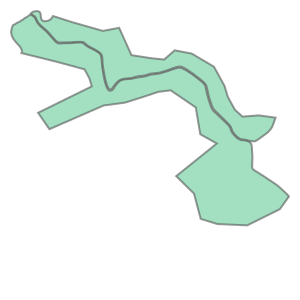

In [6]:
gdf.geometry[1]

In [2]:
for alg in QgsApplication.processingRegistry().algorithms():
    print(alg.id(), "->", alg.displayName())


native:addautoincrementalfield -> Add autoincremental field
native:addfieldtoattributestable -> Add field to attributes table
native:adduniquevalueindexfield -> Add unique value index field
native:addxyfields -> Add X/Y fields to layer
native:affinetransform -> Affine transform
native:aggregate -> Aggregate
native:angletonearest -> Align points to features
native:antimeridiansplit -> Geodesic line split at antimeridian
native:arrayoffsetlines -> Array of offset (parallel) lines
native:arraytranslatedfeatures -> Array of translated features
native:aspect -> Aspect
native:assignprojection -> Assign projection
native:atlaslayouttoimage -> Export atlas layout as image
native:atlaslayouttomultiplepdf -> Export atlas layout as PDF (multiple files)
native:atlaslayouttopdf -> Export atlas layout as PDF (single file)
native:batchnominatimgeocoder -> Batch Nominatim geocoder
native:bookmarkstolayer -> Convert spatial bookmarks to layer
native:boundary -> Boundary
native:boundingboxes -> Bounding